In [1]:
from muon_sim import mcmc
import numpy as np
import numpy.linalg as lg
import matplotlib.pyplot as plt

In [2]:
N = 1000

In [3]:
def func(v1, v2):
    r1 = lg.norm(v1, axis=0)
    r2 = lg.norm(v2, axis=0)
    d = lg.norm(- v2 + v1, axis=0)
    return np.exp(-4 * (r1 + r2) + d)

In [4]:
def dot(v1, v2):
    dx = v1[0, :] * v2[0, :]
    dy = v1[1, :] * v2[1, :]
    dz = v1[2, :] * v2[2, :]
    return dx + dy + dz

In [5]:
def calc_E(v1, v2):
    r1 = lg.norm(v1, axis=0)
    r2 = lg.norm(v2, axis=0)
    d = lg.norm(- v2 + v1, axis=0)
    r1r12 = dot(v1, v2 - v1)
    r2r12 = dot(v2, v2 - v1)
    return -17 / 4 + r1r12 / (r1 * d) - r2r12 / (r2 * d)

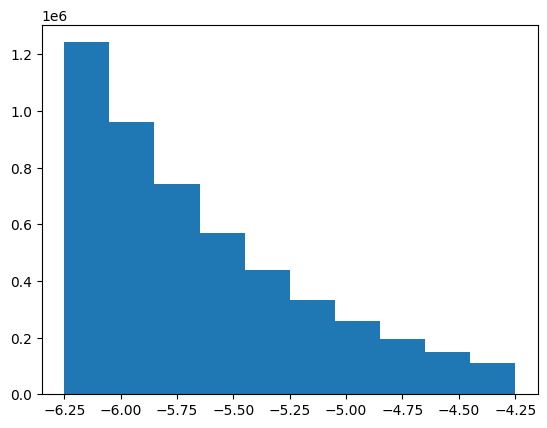

In [6]:
v1 = np.random.uniform(-1, 1, (3, N))
v2 = np.random.uniform(-1, 1, (3, N))
E = []
e = []
dx = 0.1
for i in range(5000):
    eps1 = np.random.uniform(-1 * dx, 1 * dx, (3, N))
    eps2 = np.random.uniform(-1 * dx, 1 * dx, (3, N))
    r = func(v1 + eps1, v2 + eps2) / func(v1, v2)
    alpha = np.random.uniform(0, 1, N)
    mask = alpha <= r
    # mask = ~mask
    v1[:, mask] = v1[:, mask] + eps1[:, mask] 
    v2[:, mask] = v2[:, mask] + eps2[:, mask]
    ei = calc_E(v1, v2)
    E.append(ei)
    e.append(ei[0])
E = np.hstack(E)
plt.hist(E)
plt.show()

In [7]:
np.mean(E)

-5.647302911569365

In [8]:
len(E)

5000000

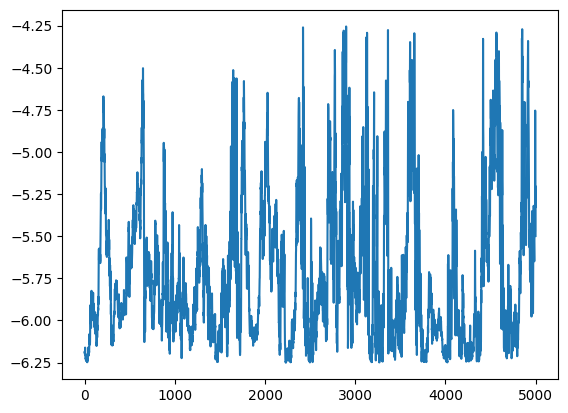

In [9]:
plt.plot(e)
plt.show()